<a href="https://colab.research.google.com/github/YunmeiHuanghi/TreeDetectionPy/blob/main/supervision_Roboflow_autodistill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install supervision

In [ ]:
#yolo, detectron2

#autodistill,
https://github.com/autodistill/autodistill
# basemodel (like SAM,DINO) +   target model. -like yolov5.

In [1]:
%cd /content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/tree_dection_2023July/test_images

/content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/tree_dection_2023July/test_images


'/content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/tree_dection_2023July'

In [ ]:
!ls

In [3]:
#without labeling images.

tree_trunks_img="/content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/bark_martell_labelled"

In [4]:
!pip install autodistill autodistill-grounded-sam autodistill-yolov8
#install packages

In [5]:
!pip install -q \
autodistill \
autodistill-grounded-sam \
autodistill-yolov8 \
supervision==0.9.0

In [6]:
tree_trunks_img

'/content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/bark_martell_labelled'

In [7]:
import os
HOME = os.getcwd()
print(HOME)

/content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/tree_dection_2023July/test_images


In [ ]:
#%cp -r /content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/bark_martell_labelled .

## display image samples

In [24]:
ls

'Copy of 1_0100_TP30_19.10in_0_20210430.jpg'
'Copy of 1_0248_TP18_dbh_8_20210429.jpg'
'Copy of 1_0530_TP33_dbh_4_20210429.jpg'
'Copy of 1_0603_TP21_dbh_0_20210430 (1).jpg'
'Copy of 1_0603_TP21_dbh_0_20210430.jpg'
'Copy of 1_0603_TP21_dbh_1_20210430.jpg'
'Copy of 1_0705_TP16_25.46in_4_20210505.jpg'
'Copy of 1_0705_TP16_25.46in_5_20210505.jpg'
'Copy of 1_0705_TP16_25.46in_6_20210505.jpg'
'Copy of 1_0707_TP17_26.10in_1_20210505.jpg'
'Copy of 6_0659_BassW3&4_17.51in_11_20210504.jpg'
'Copy of 6_0659_BassW3&4_17.51in_8_20210504.jpg'


In [8]:
import supervision as sv
IMAGE_DIR_PATH = "."
image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpg"])
# count number of images
print('image count:', len(image_paths))

image count: 62


### display images

bark_martell_labelled/  dataset/  output_img/


In [9]:
IMAGE_DIR_PATH = f"{HOME}/"
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 16)

In [10]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

KeyboardInterrupt: ignored

#autolable dataset

### Define ontology

**Ontology** - an Ontology defines how your Base Model is prompted, what your Dataset will describe, and what your Target Model will predict. A simple Ontology is the CaptionOntology which prompts a Base Model with text captions and maps them to class names. Other Ontologies may, for instance, use a CLIP vector or example images instead of a text caption.


In [12]:
from autodistill.detection import CaptionOntology

ontology=CaptionOntology({
    "tree, tree bark, brown trunk": "tree",
    "grass": "grass",
    "red tag, string, white tape":"tag or tape",
    "human hand":"hand",
    "ground or soil":"ground"
})

### Initiate base model and autolabel

**Base Model** - A Base Model is a large foundation model that knows a lot about a lot. Base models are often multimodal and can perform many tasks. They're large, slow, and expensive. Examples of Base Models are GroundedSAM and GPT-4's upcoming multimodal variant. We use a Base Model (along with unlabeled input data and an Ontology) to create a Dataset.

In [13]:
DATASET_DIR_PATH = f"{HOME}"

In [41]:
IMAGE_DIR_PATH

'/content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/tree_dection_2023July/test_images/'

In [14]:
from autodistill_grounded_sam import GroundedSAM

base_model = GroundedSAM(ontology=ontology)
dataset = base_model.label(
    input_folder=IMAGE_DIR_PATH,
    extension=".jpg",
    output_folder=DATASET_DIR_PATH)

trying to load grounding dino directly


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Labeling /content/drive/MyDrive/0PhD_study_purdue/2_bark_classification_paper/bark_id_project_learning/tree_dection_2023July/test_images/Copy of 1_0530_TP33_dbh_4_20210429.jpg:   0%|       

Labeled dataset created - ready for distillation.


annotations  data.yaml	images	train  valid


### Display dataset sample

**Dataset** - a Dataset is a set of auto-labeled data that can be used to train a Target Model. It is the output generated by a Base Model.

In [15]:
ANNOTATIONS_DIRECTORY_PATH = f"{HOME}/train/labels"
IMAGES_DIRECTORY_PATH = f"{HOME}/train/images"
DATA_YAML_PATH = f"{HOME}/data.yaml"

In [16]:
import supervision as sv

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

24

In [27]:
sv.DetectionDataset.from_yolo?

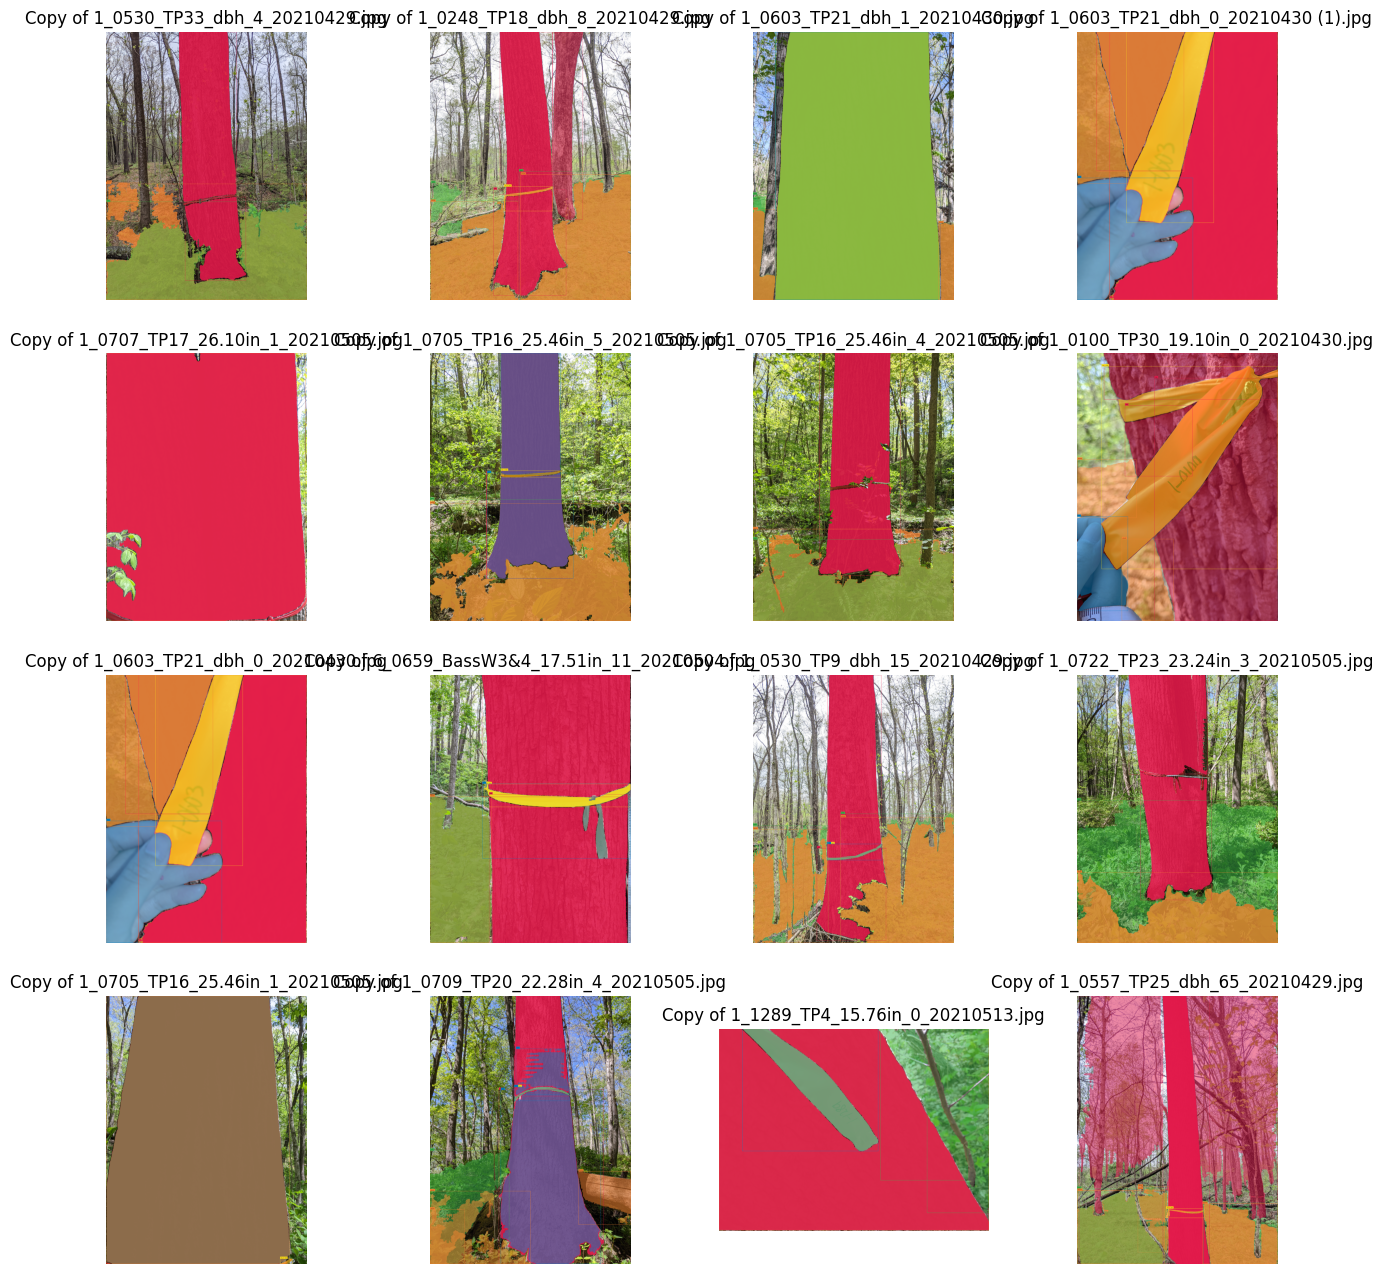

In [17]:
import supervision as sv

image_names = list(dataset.images.keys())[:SAMPLE_SIZE]

mask_annotator = sv.MaskAnnotator()
box_annotator = sv.BoxAnnotator()

images = []
for image_name in image_names:
    image = dataset.images[image_name]
    annotations = dataset.annotations[image_name]
    labels = [
        dataset.classes[class_id]
        for class_id
        in annotations.class_id]
    annotates_image = mask_annotator.annotate(
        scene=image.copy(),
        detections=annotations)
    annotates_image = box_annotator.annotate(
        scene=annotates_image,
        detections=annotations,
        labels=labels)
    images.append(annotates_image)

sv.plot_images_grid(
    images=images,
    titles=image_names,
    grid_size=SAMPLE_GRID_SIZE,
    size=SAMPLE_PLOT_SIZE)

# show labels and delect wrong labels from the automating results

## 🔥 Train target model - YOLOv8

**Target Model** - a Target Model is a supervised model that consumes a Dataset and outputs a distilled model that is ready for deployment. Target Models are usually small, fast, and fine-tuned to perform a specific task very well (but they don't generalize well beyond the information described in their Dataset). Examples of Target Models are YOLOv8 and DETR.

In [ ]:
%cd {HOME}

from autodistill_yolov8 import YOLOv8

target_model = YOLOv8("yolov8n.pt")
target_model.train(DATA_YAML_PATH, epochs=50)

In [20]:
!ls {HOME}/runs/detect/train/

args.yaml					     results.csv
confusion_matrix.png				     results.png
events.out.tfevents.1688927021.85537f6b0371.22818.0  train_batch0.jpg
F1_curve.png					     train_batch1.jpg
labels_correlogram.jpg				     train_batch2.jpg
labels.jpg					     val_batch0_labels.jpg
P_curve.png					     val_batch0_pred.jpg
PR_curve.png					     weights
R_curve.png


## ⚖️ Evaluate target model

**NOTE:** As with the regular YOLOv8 training, we can now take a look at artifacts stored in `runs` directory.

In [ ]:
%cd {HOME}

from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)